In [2]:
from logicqubit.logic import *
from cmath import *
from scipy.linalg import expm, sinm, cosm, logm, sqrtm
import sympy as sp

Cuda is not available!
logicqubit version 1.5.6


In [3]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

/home/cleoner/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


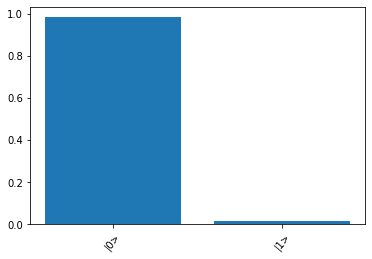

[(0.9844562108553223+0j), (0.015543789144677609+0j)] (0.12467473338522769+0j)


In [4]:
logicQuBit  = LogicQuBit(4)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
a = Qubit()

#x1.X()
#x2.X()
x3.X()

# RY(a)*RY(b) = RY(a+b)
a.CRY(x3, 1/4) # theta 1/8
a.CRY(x2, 1/2) # theta 1/4
a.CRY(x1, 1)   # theta 1/2

res = logicQuBit.Measure([a])
logicQuBit.Plot()
print(res, sqrt(res[1]))

In [5]:
# |x> = |x1x2...xn> => x = 0.x1x2...xn, onde 0 < x < 1
# CRy|x>|0> = |x>(cos(x)|0> + sin(x)|1>)
# para valores pequenos de x, sin(x) ~ x
# CRy|x>|0> = |x>(sqrt(1-x^2)|0> + x|1>)

x = 0/2**1 + 0/2**2 + 1/2**3
print(x,[cos(x)**2,sin(x)**2])

0.125 [(0.9844562108553223+0j), (0.015543789144677609+0j)]


In [6]:
%%latex
\begin{align}
 R|x>|0> = |x>(cos(x)|0> + sin(x)|1>) \\
 x = \sum_{k=1}^{n} x_{k}2^{-k}
\end{align}

<IPython.core.display.Latex object>

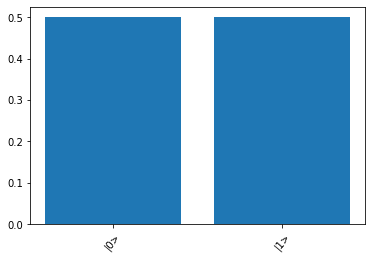

[(0.5000000000000001+0j), (0.5+0j)] (0.7071067811865476+0j) (0.7071067811865476+0j)


In [41]:
logicQuBit  = LogicQuBit(2)

x1 = Qubit()
x2 = Qubit()

x1.RY(pi/6)
x2.CX(x1)
#x3.RY(pi/4)
x2.RY(pi/2) # a+b, a-b / 0.70710678

res = logicQuBit.Measure([x2])
logicQuBit.Plot()
print(res, sqrt(res[0]), sqrt(res[1]))

In [29]:
(0.9238795325112867-0.3826834323650898)

0.5411961001461969

In [32]:
sqrt(res[0])-sqrt(res[1])

(-0.5411961001461969+0j)

In [35]:
sqrt(res[0])/0.70710678

(0.5411961010543412+0j)

In [47]:
v=np.array([[ 0.70710678+0.j, -0.70710678-0.j,  0.        +0.j,  0.        -0.j],
 [ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,  0.        +0.j],
 [ 0.        +0.j,  0.        -0.j,  0.70710678+0.j, -0.70710678-0.j],
 [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,  0.70710678+0.j]])

In [45]:
psi = np.array([[0.96592583+0.j],
 [0.        +0.j],
 [0.        +0.j],
 [0.25881905+0.j]])

In [49]:
v*psi

array([[ 0.6830127 +0.j, -0.6830127 +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.18301271+0.j,
         0.18301271+0.j]])